# DAA Project – Transmission Line Fault Detection and Classification  
**BT23CSE001, BT23CSE016, BT23CSE038**

## Introduction

Electrical power transmission systems are prone to various types of faults such as single line-to-ground (LG), line-to-line (LL), double line-to-ground (LLG), and three-phase (LLL) faults. These faults, if not detected and cleared promptly, can cause severe damage to equipment, blackouts, and safety hazards.

In this project, we focus on the detection and classification of transmission line faults using Artificial Neural Networks (ANN). The use of ANN models provides a robust and efficient approach for analyzing fault data and accurately identifying fault types based on input parameters like voltage and current waveforms.

By leveraging machine learning techniques, particularly supervised learning via ANN architectures, the model can learn to distinguish between different fault types, enhancing the reliability and automation of fault analysis in power systems.
## Objective

This notebook implements and analyzes various ANN models to detect and classify faults in transmission lines. It includes:

- Training and testing of ANN models  
- Visualization of performance metrics through graphs  
- Evaluation based on accuracy, precision, recall, and other relevant metrics  

The goal is to assess the effectiveness of ANN-based approaches in automating fault classification in power systems.


# Electrical Fault detection and Classification using ANN models

In [3]:
# Importing necessary packages
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Importing the data
detection_train = pd.read_excel('detect_dataset.xlsx').dropna(axis=1)
class_train = pd.read_csv('classData.csv').dropna(axis=1)

features=['Ia','Ib','Ic','Va','Vb','Vc']
class_target = ['G','C','B','A']

In [5]:
#Defining the inputs and outputs
detection_data_X = detection_train[features]
class_data_X = class_train[features]
detection_data_Y = detection_train['Output (S)']
class_data_Y = class_train[class_target]

#Defining accuracy and error vectors
detect_accuracy = list()
detect_error = list()
class_accuracy = list()
class_error = list()

In [6]:
#Splitting the data 
class_train_X,class_test_X,class_train_Y,class_test_Y= train_test_split(class_data_X,class_data_Y,test_size=0.33,random_state=1)
detection_train_X,detection_test_X,detection_train_Y,detection_test_Y = train_test_split(detection_data_X,detection_data_Y,test_size=0.33,random_state=1)

# Linear regression

In [7]:
#Defining different Models for different classification problems
detection_model = linear_model.Lasso(alpha = 2.0)
class_model = LinearRegression()

In [8]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearRegression()

### Results

In [9]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.24375743622444437
The Error of our Classification Model is:  17.301569015218817


In [10]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.017945755271112085
The accuracy score of our Classification Model is:  0.03349707430965532


### Graphs

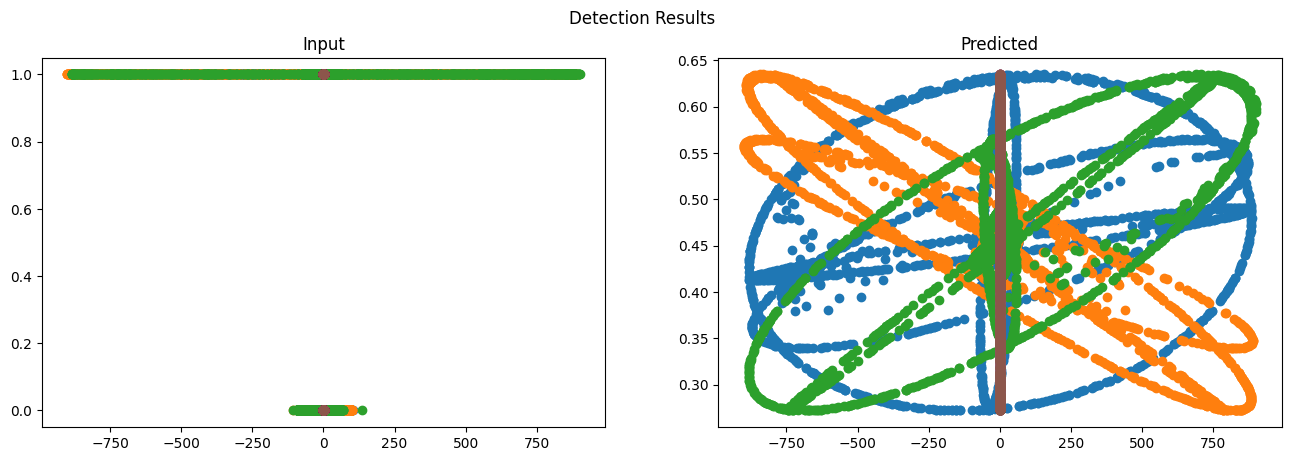

In [11]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

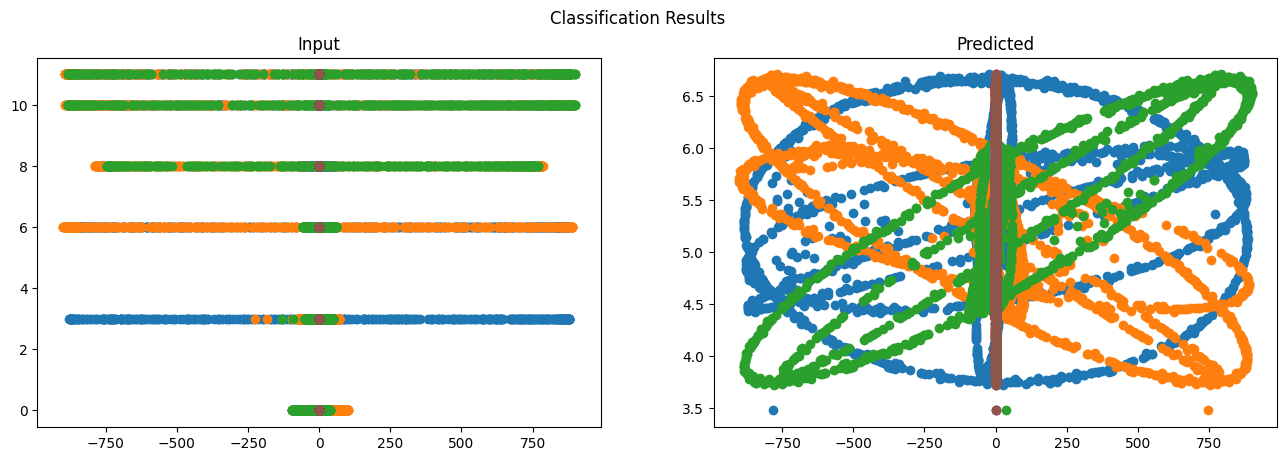

In [12]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Logistic regression

In [13]:
#Defining different Models for different classification problems
detection_model = LogisticRegression(max_iter=5000)
class_model = LogisticRegression(max_iter=5000)

In [14]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LogisticRegression(max_iter=5000)

### Results

In [15]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.26155011360767483
The Error of our Classification Model is:  42.65895953757225


In [16]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.7384498863923251
The accuracy score of our Classification Model is:  0.32524084778420037


### Graphs

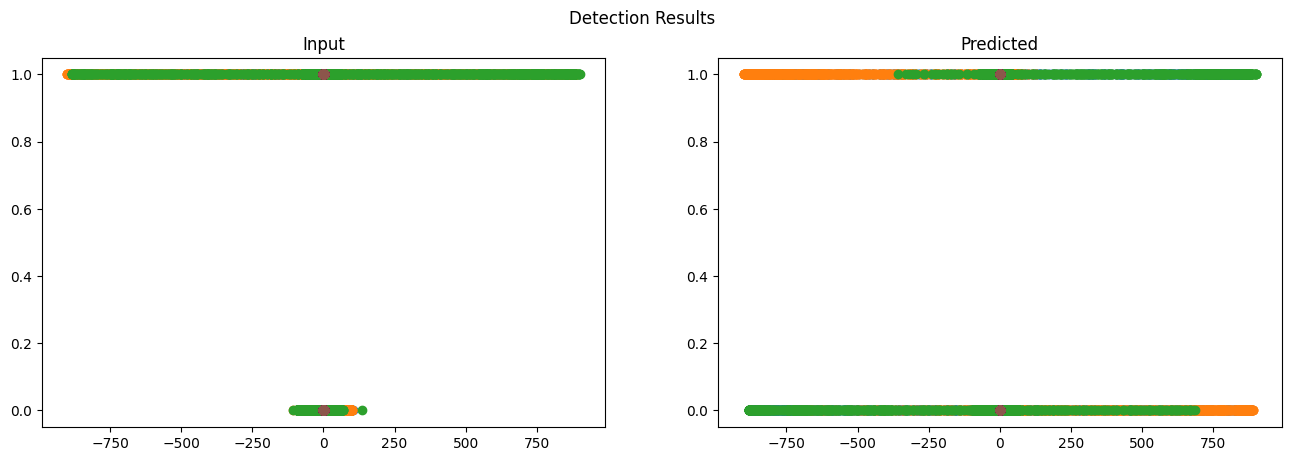

In [17]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

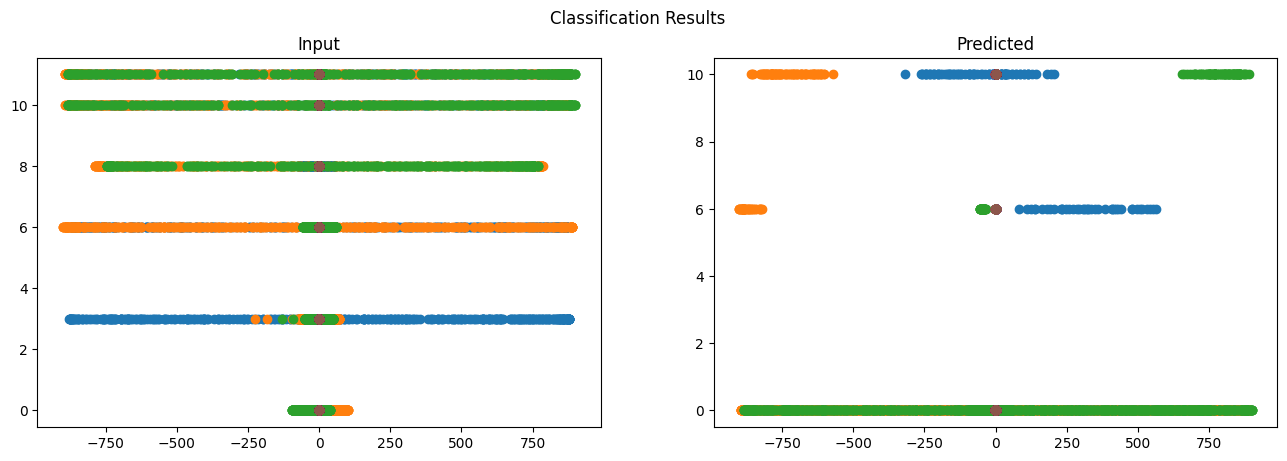

In [18]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Polynomial regression

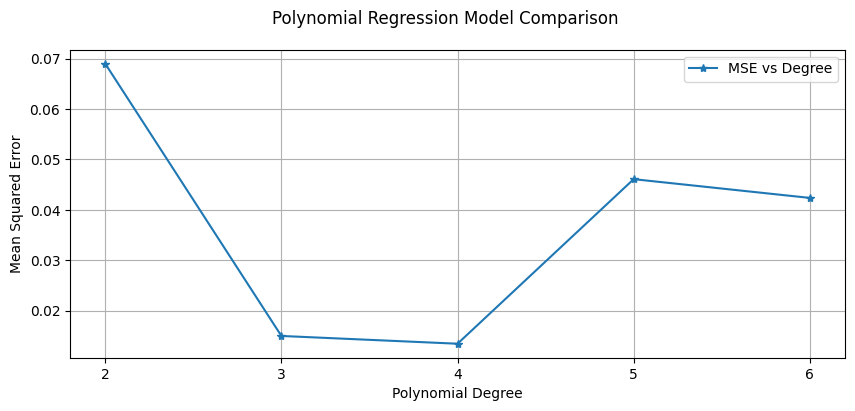

In [19]:
# Selection of suitable polynomial degree
errors = []
degrees = list(range(2, 7))  # Degrees 2 to 6

for i in degrees:
    poly = PolynomialFeatures(i)
    model = LinearRegression()
    model.fit(poly.fit_transform(class_train_X), class_train_Y)
    preds = model.predict(poly.fit_transform(class_test_X))
    errors.append(mean_squared_error(class_test_Y, preds))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.suptitle('Polynomial Regression Model Comparison')

# Set ticks and labels to match degree indices
ax.set_xticks(range(len(degrees)))
ax.set_xticklabels([str(d) for d in degrees])

ax.plot(errors, '*-', label='MSE vs Degree')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Polynomial Degree')
ax.grid(True)
ax.legend()
plt.show()


In [20]:
#Defining different Models for different classification problems
detection_model = PolynomialFeatures(2)
class_model = PolynomialFeatures(4)
detect_linear = LinearRegression()
class_linear = LinearRegression()

In [21]:
#Fitting the data in different models
detect_linear.fit(detection_model.fit_transform(detection_train_X),detection_train_Y)
class_linear.fit(class_model.fit_transform(class_train_X),class_train_Y)

LinearRegression()

### Results

In [22]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detect_linear.predict(detection_model.fit_transform(detection_test_X))
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_preds = class_linear.predict(class_model.fit_transform(class_test_X))
print('The Error of our Classification Model is: ',mean_squared_error(class_test_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_test_Y,class_preds))

The Error of our Detection Model is:  0.03445426707454392
The Error of our Classification Model is:  0.013437887105488064


In [23]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

#Storing accuracy values
detect_accuracy.append((detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
class_accuracy.append((class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

The accuracy score of our Detection Model is:  0.8611900430458109
The accuracy score of our Classification Model is:  0.9451278131164605


### Graphs

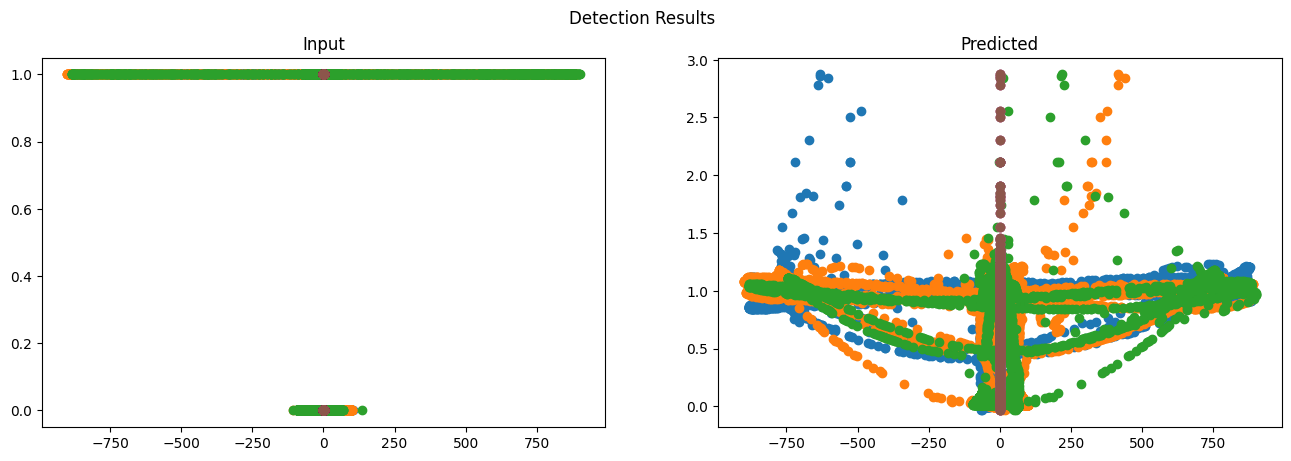

In [24]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

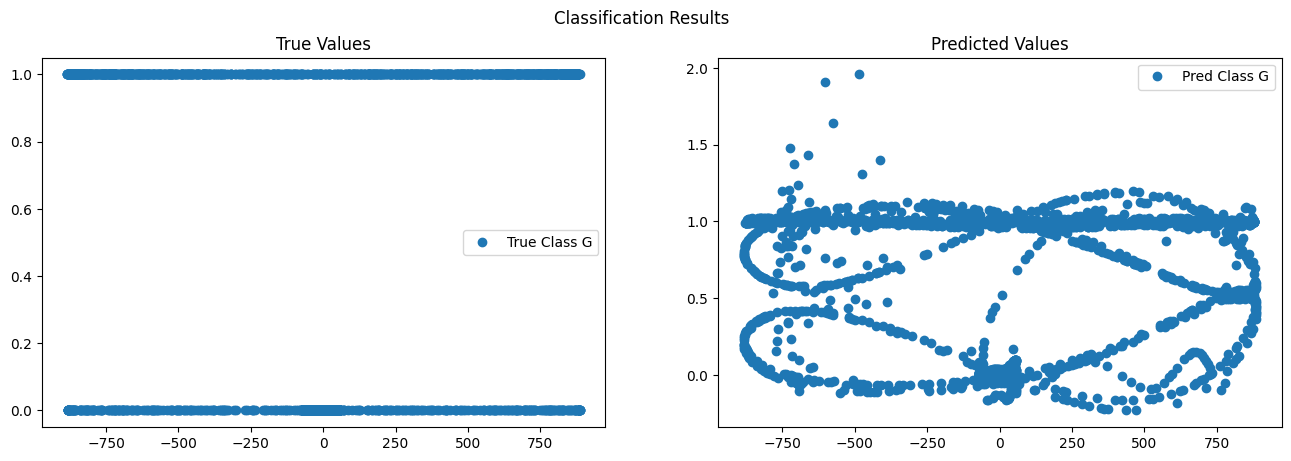

In [25]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')

axs[0].set_title('True Values')
axs[1].set_title('Predicted Values')

# Plot feature 0 vs class 0 (example)
axs[0].plot(class_test_X.iloc[:, 0], class_test_Y.iloc[:, 0], 'o', label='True Class G')
axs[1].plot(class_test_X.iloc[:, 0], class_preds[:, 0], 'o', label='Pred Class G')

axs[0].legend()
axs[1].legend()
plt.show()


# Naive Bayes

In [26]:
#Defining different Models for different classification problems
detection_model = GaussianNB()
class_model = GaussianNB()

In [27]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

GaussianNB()

### Results

In [28]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.019439535470840697
The Error of our Classification Model is:  2.1078998073217727


In [29]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9805604645291593
The accuracy score of our Classification Model is:  0.796917148362235


### Graphs

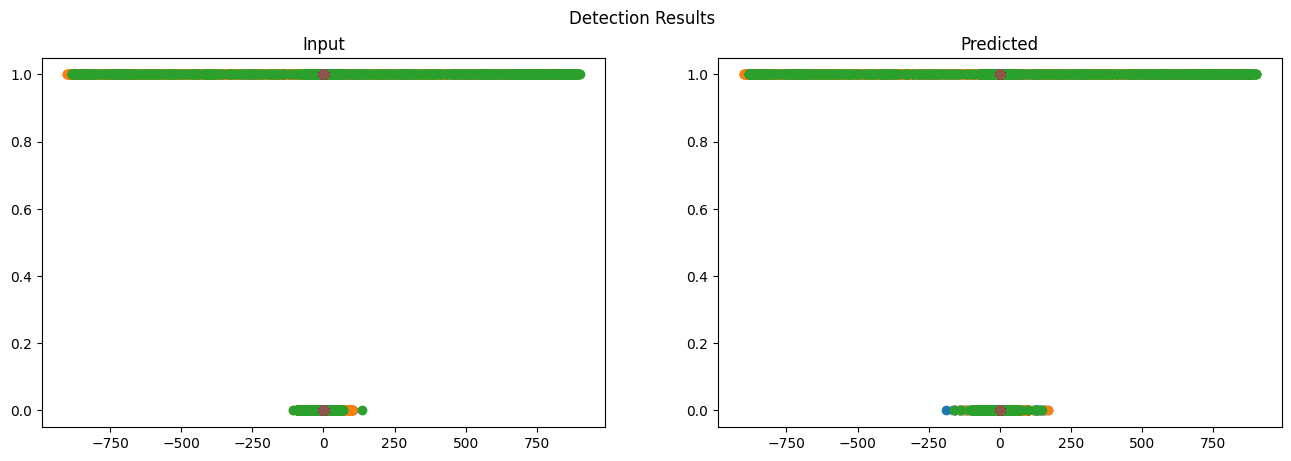

In [30]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

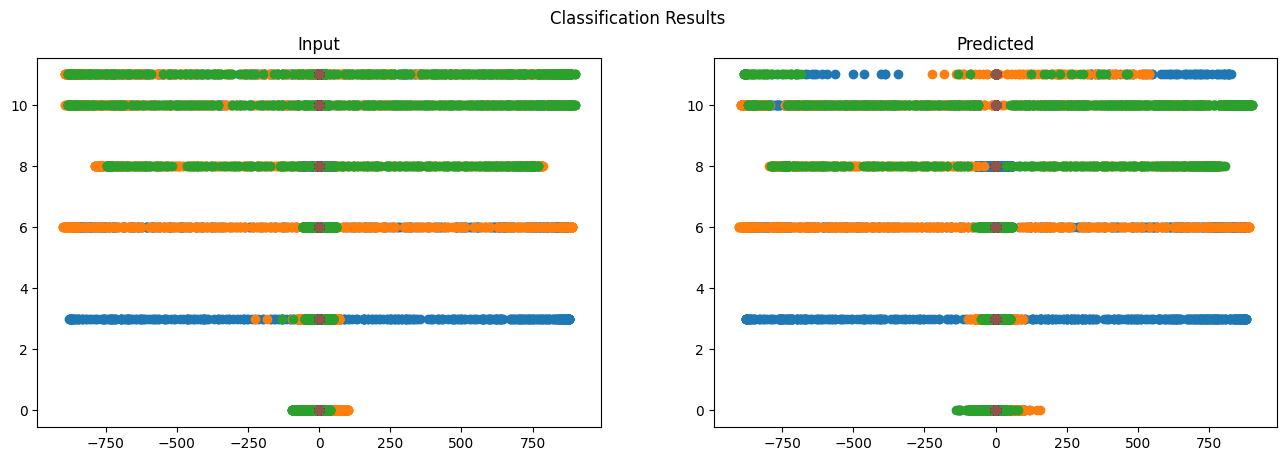

In [31]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Decision Tree classifier

In [32]:
#Defining different Models for different classification problems
detection_model = DecisionTreeClassifier()
class_model = DecisionTreeClassifier()

In [33]:

#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

DecisionTreeClassifier()

### Results

In [34]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.005806614491290078
The Error of our Classification Model is:  0.3221579961464355


In [35]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.99419338550871
The accuracy score of our Classification Model is:  0.8639691714836224


### Graphs

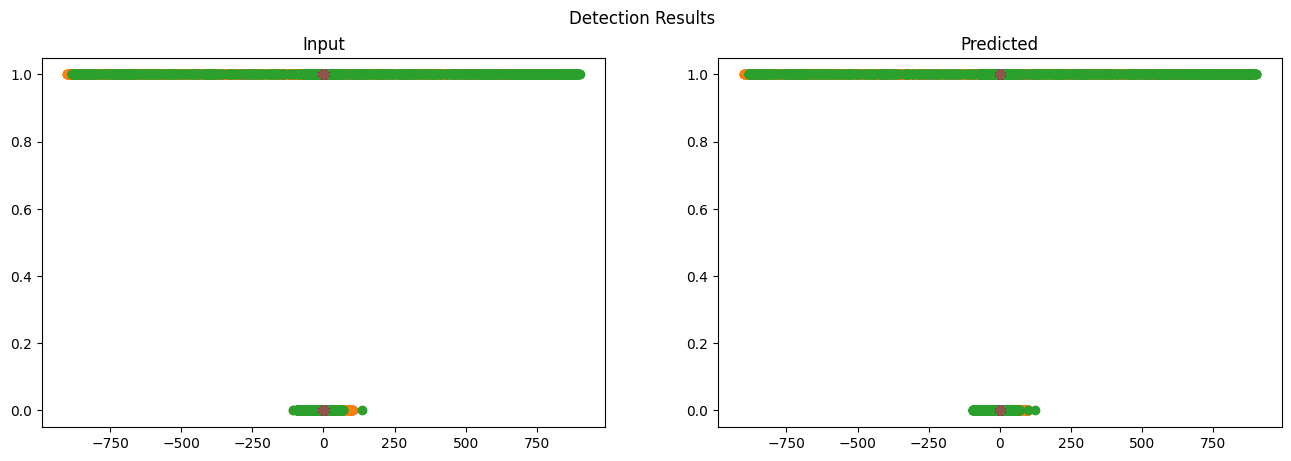

In [36]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

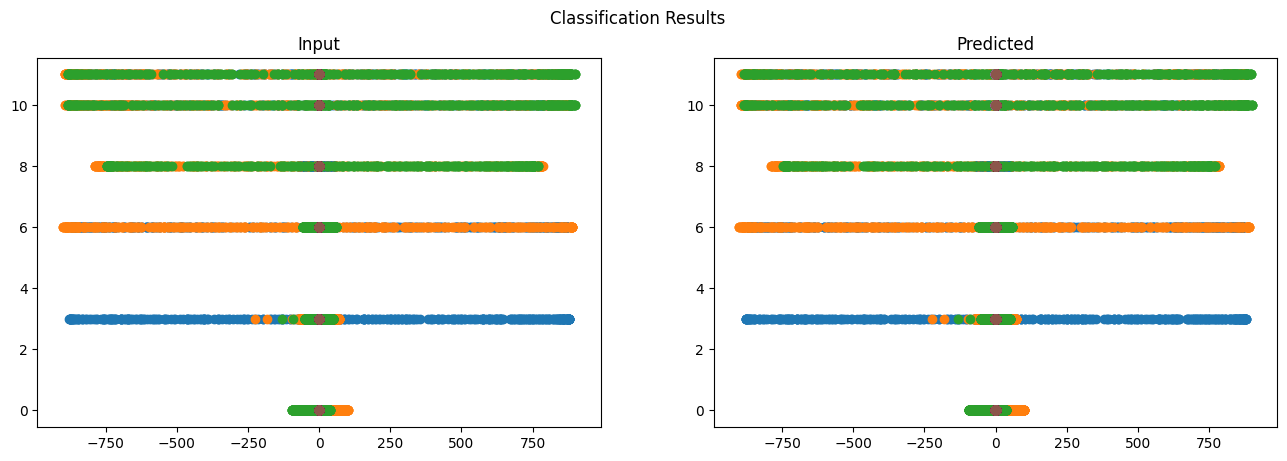

In [37]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# SVM

In [38]:
#Defining different Models for different classification problems
detection_model = SVC()
class_model = LinearSVC()

In [39]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearSVC()

### Results

In [40]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.01792476647311285
The Error of our Classification Model is:  41.223121387283236


In [41]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9820752335268872
The accuracy score of our Classification Model is:  0.31676300578034683


### Graphs

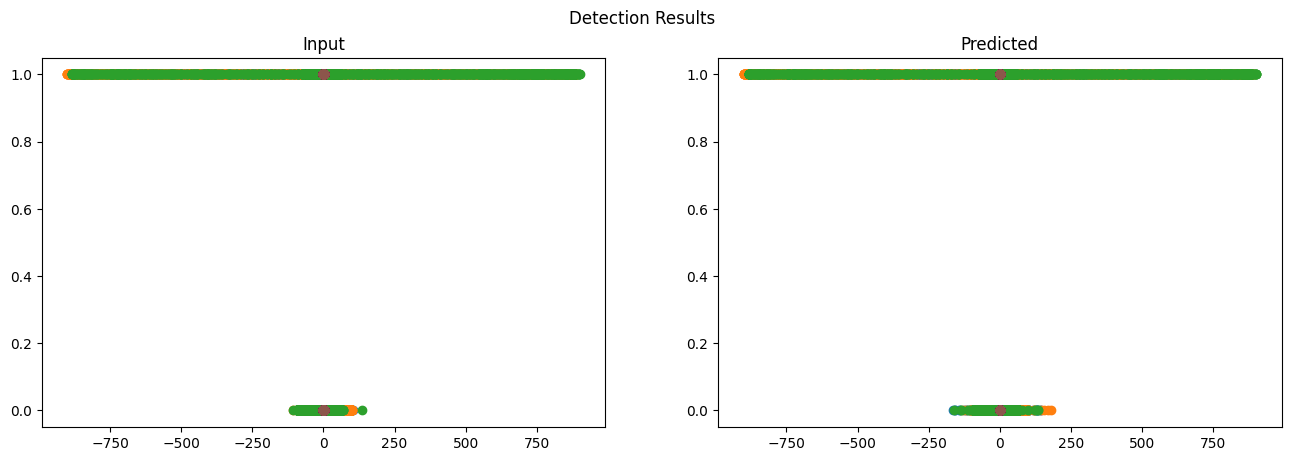

In [42]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

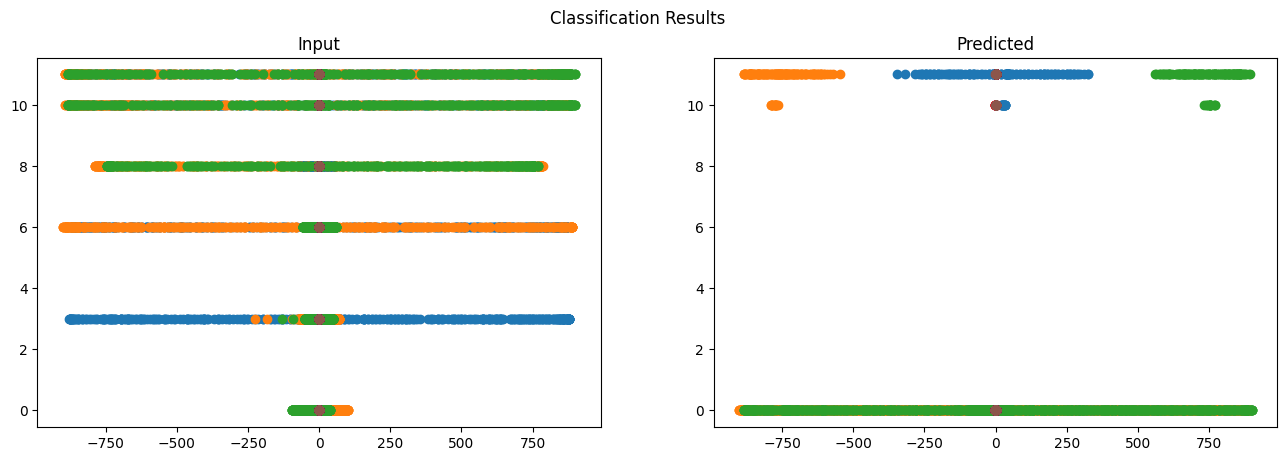

In [43]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# KNN

In [44]:
#Defining different Models for different classification problems
detection_model = KNeighborsClassifier(n_neighbors=2)
class_model = KNeighborsClassifier(n_neighbors=6)

In [45]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

KNeighborsClassifier(n_neighbors=6)

### Results

In [46]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.007573844988639233
The Error of our Classification Model is:  0.9845857418111753


In [47]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9924261550113608
The accuracy score of our Classification Model is:  0.8246628131021194


### Graphs

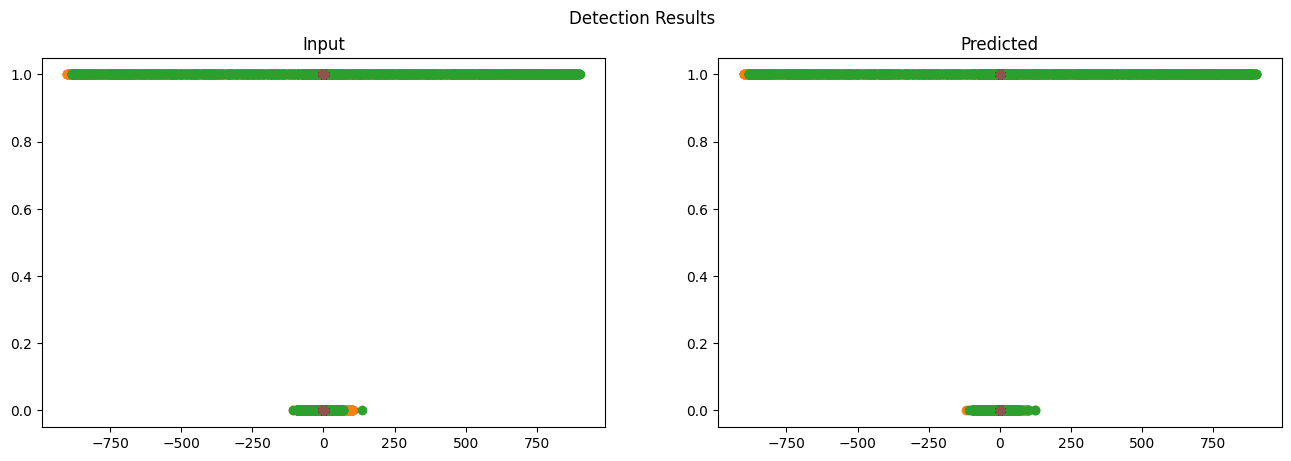

In [48]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(detection_test_X, detection_test_Y,'o')
axs[1].plot(detection_test_X, detection_preds,'o')

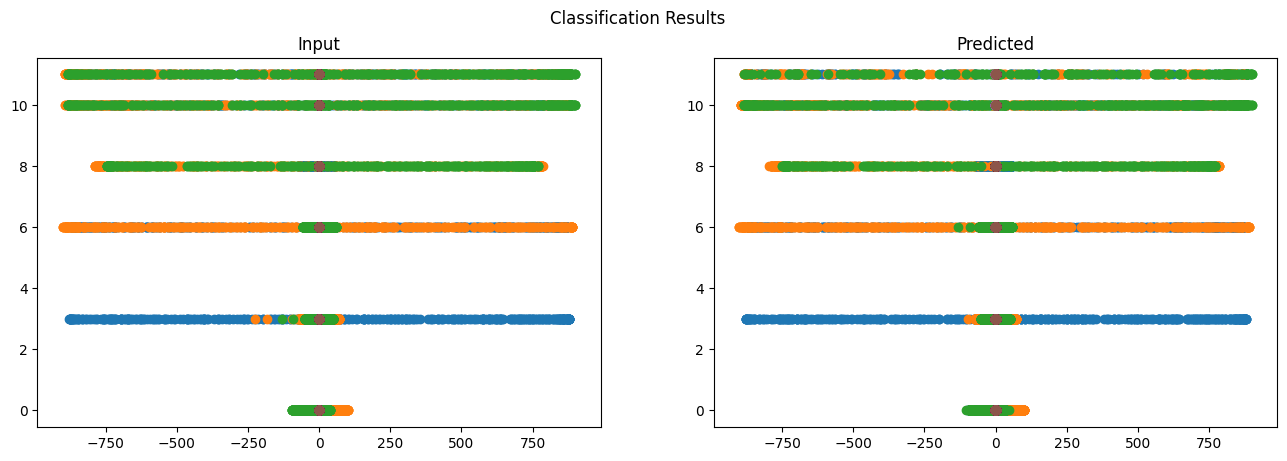

In [49]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Results')
axs[0].set_title('Input')
axs[1].set_title('Predicted')
axs[0].plot(class_test_X, class_Y,'o')
axs[1].plot(class_test_X, class_preds,'o')

# Model selection

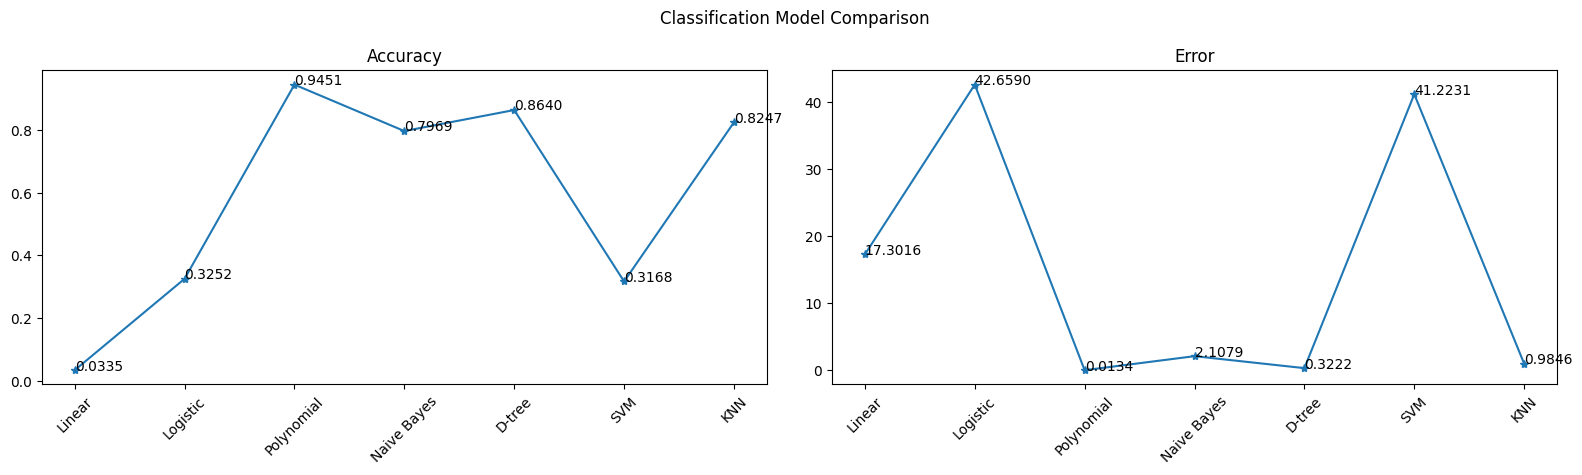

In [72]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
fig.suptitle('Classification Model Comparison')

model_names = ['Linear', 'Logistic', 'Polynomial', 'Naive Bayes', 'D-tree', 'SVM', 'KNN']

x = list(range(len(model_names)))

# Plot Accuracy
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names, rotation=45)
ax[0].set_title('Accuracy')
ax[0].plot(class_accuracy, '*-')
for i, val in enumerate(class_accuracy):
    ax[0].annotate(f"{val:.4f}", xy=(i, val))

# Plot Error
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names, rotation=45)
ax[1].set_title('Error')
ax[1].plot(class_error, '*-')
for i, val in enumerate(class_error):
    ax[1].annotate(f"{val:.4f}", xy=(i, val))
plt.savefig('model_classification.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

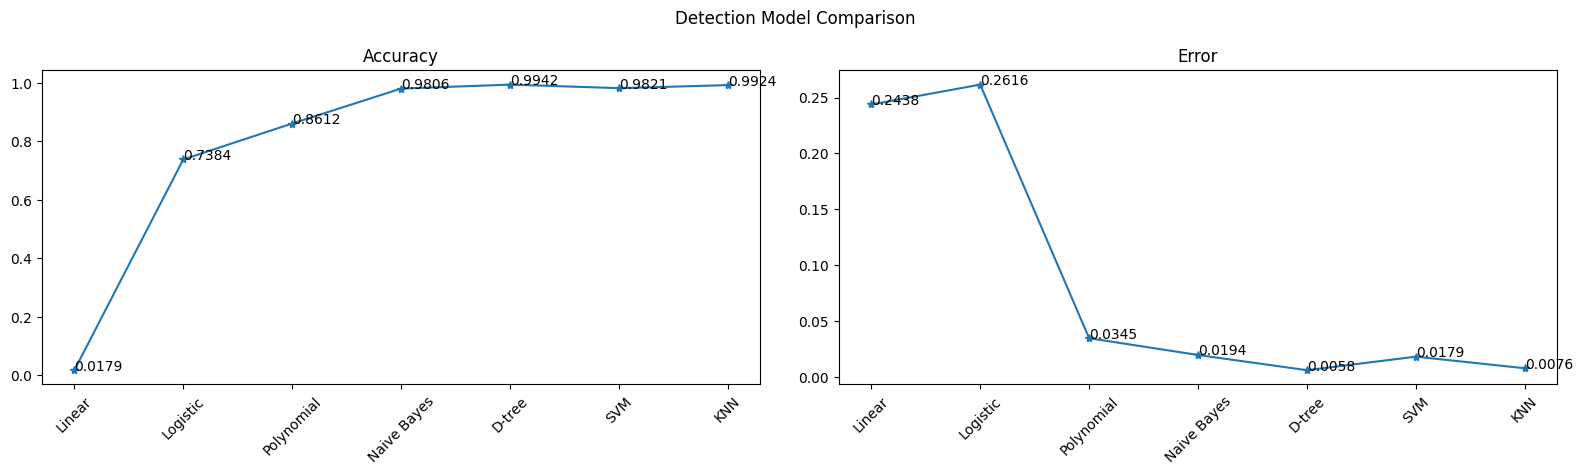

In [71]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
fig.suptitle('Detection Model Comparison')

model_names = ['Linear', 'Logistic', 'Polynomial', 'Naive Bayes', 'D-tree', 'SVM', 'KNN']

x = list(range(len(model_names)))

# Plot Accuracy
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names, rotation=45)
ax[0].set_title('Accuracy')
ax[0].plot(detect_accuracy, '*-')
for i, val in enumerate(detect_accuracy):
    ax[0].annotate(f"{val:.4f}", xy=(i, val))

# Plot Error
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names, rotation=45)
ax[1].set_title('Error')
ax[1].plot(detect_error, '*-')
for i, val in enumerate(detect_error):
    ax[1].annotate(f"{val:.4f}", xy=(i, val))
plt.savefig('model_detection.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()